In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
from math import sqrt

from time import time

from sklearn.ensemble import RandomForestClassifier as RFC

# Load the Dataset Wine

In [2]:
wine = pd.read_csv("Datasets/winequality/winequality-red.csv", sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Preorcessing 
## 1) simplest method for the target coloum is to seperate the quality in good or bad (0,1) 

In [4]:
wine_GB = wine
bins = (2, 6.5, 8) # stets the cut which diveide the values in 0 or 1
group_names = ["bad", "good"]
wine_GB["quality"] = pd.cut(wine_GB["quality"], bins = bins, labels = group_names)
#wine["quality"].unique()
label_quality = LabelEncoder()

wine_GB["quality"] = label_quality.fit_transform(wine_GB["quality"])

In [5]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [6]:
wine_GB["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

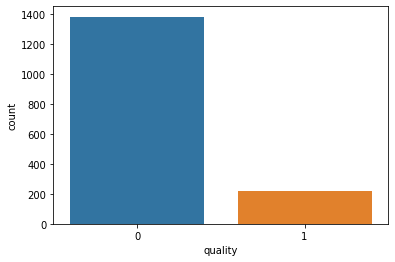

In [19]:
sns.countplot(wine["quality"])
plt.savefig("quality_1")

In [7]:
X = wine.drop("quality", axis=1)
y = wine_GB["quality"]

# Stale the dataset differenty

In [34]:
X_train_GB, X_valid_GB, Y_train, Y_valid = train_test_split(X, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_GB)
X_train_GB_SC = scaler.transform(X_train_GB)
X_valid_GB_SC = scaler.transform(X_valid_GB)

from sklearn.preprocessing import normalize
X_train_GB_N = normalize(X_train_GB, norm='l2')
X_valid_GB_N = normalize(X_valid_GB, norm='l2')

from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0)
X_train_GB_QT = quantile_transformer.fit_transform(X_train_GB)
X_valid_GB_QT = quantile_transformer.transform(X_valid_GB)


## 2) try to split the target into three groups Bad, Medium and Good

In [13]:
wine_BMG = pd.read_csv("Datasets/winequality/winequality-red.csv", sep=';')

In [14]:
print(wine_BMG.quality.unique())
for i in range(len(wine_BMG.quality)):
    if(wine_BMG.quality[i] < 4):
        wine_BMG.quality[i] = 1
    if(wine_BMG.quality[i] > 6):
        wine_BMG.quality[i] = 3
    if(wine_BMG.quality[i] > 3 and wine_BMG.quality[i] < 7):
        wine_BMG.quality[i] = 2
    

[5 6 7 4 8 3]


In [15]:
wine_BMG["quality"].value_counts()

2    1372
3     217
1      10
Name: quality, dtype: int64

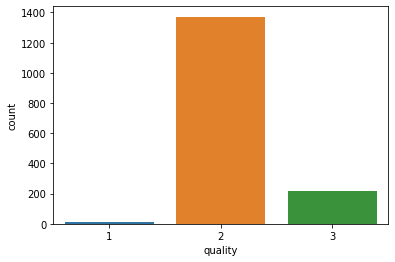

In [18]:
sns.countplot(wine_BMG["quality"])
plt.savefig("quality_2")

In [21]:
X = wine_BMG.drop("quality", axis=1)
y = wine_BMG["quality"]

In [22]:
X_train_BMG, X_valid_BMG, Y_train, Y_valid = train_test_split(X, y, test_size = 0.3)

In [23]:
X_train_BMG, X_valid_BMG, Y_train, Y_valid = train_test_split(X, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_BMG)
X_train_BMG_SC = scaler.transform(X_train_BMG)
X_valid_BMG_SC = scaler.transform(X_valid_BMG)

from sklearn.preprocessing import normalize
X_train_BMG_N = normalize(X_train_BMG, norm='l2')
X_valid_BMG_N = normalize(X_valid_BMG, norm='l2')

from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0)
X_train_BMG_QT = quantile_transformer.fit_transform(X_train_BMG)
X_valid_BMG_QT = quantile_transformer.transform(X_valid_BMG)

# Set parameters

In [38]:
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1]
activation = ["identity","relu","tanh"]
activation = ["relu"]
solver = ["adam"]
h = [11,30,100]
maxiter = 10000

In [39]:
def MLP_Search(alphas,modes,solv, h,maxiter,X_train, X_valid, Y_train, Y_valid):
    erg = []
    for g in h:
        for i in alphas:
            for j in modes:
                for k in solv:
                    clf = MLPClassifier(hidden_layer_sizes=(g,g,g), max_iter=maxiter, alpha=i,solver=k,activation=j,tol = 1e-9)
                    clf.fit(X_train, Y_train)
                    Y_pred = clf.predict(X_valid)
                    print("Hidden layers: ",g,"|\talpha: ",i,"|\tmode: ",j,"|\tsolver: ",k,"|\tscore: ",accuracy_score(Y_valid, Y_pred))
                    erg.append({
                        "h": g,
                        "alpha": i,
                        "mode": j,
                        "solver": k,
                        "score": accuracy_score(Y_valid, Y_pred)})
        print("")
    return erg

In [30]:
def Statistic(Y_valid,Y_pred,name):
    print("Heat map: ")
    plt.figure()
    cm = confusion_matrix(Y_valid, Y_pred)
    sns.heatmap(cm, center=True)
    plt.savefig("Heatmap {}".format(name))
    plt.figure()
    sns.distplot(Y_valid)
    sns.distplot(Y_pred, color="red")
    plt.savefig("difference between prediction and validation {}".format(name))

    plt.figure()
    sns.distplot(Y_valid-Y_pred)
    plt.savefig("total difference between prediction and validation {}".format(name))
    print(sqrt(mean_squared_error(Y_valid, Y_pred)))

    Y_pred_Norm = Y_pred / np.linalg.norm(Y_pred)
    Y_valid_Norm = Y_valid / np.linalg.norm(Y_valid)

    print(sqrt(mean_squared_error(Y_pred_Norm, Y_valid_Norm)))

In [31]:
def FindBestScore(results):
    best_score = 0
    best_index = 0
    for i, res in enumerate(results):
        if res["score"] > best_score:
            best_score = res["score"]
            best_index = i
    print("best_score:", best_score)
    print("best_params:", results[best_index])
    return results[best_index]


In [32]:
def plotLC(LC,best_params):
    plt.figure()
    plt.plot(LC)#,label="activation {} Hidden Layers {} solver {} ".format(best_params["alpha"],i,l))
    plt.grid()
    plt.legend()
    plt.xlabel("Iterations")
    plt.xlabel("Loss")
    plt.title("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))
    plt.savefig("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))


# Normalize

# MLP Classifier

In [ ]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_BMG_N, X_valid_BMG_N, Y_train, Y_valid)
best_params_BMG_N = FindBestScore(results)


results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_GB_N, X_valid_GB_N, Y_train, Y_valid)
best_params_GB_N = FindBestScore(results)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(best_params_BMG_N["h"]), max_iter=10000, alpha=best_params_BMG_N["alpha"],solver=best_params_BMG_N["solver"],activation=best_params_BMG_N["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_BMG_N, Y_train)
Y_pred_BMG_N = clf.predict(X_valid_BMG_N)
LC = clf.loss_curve_
Statistic(Y_valid,Y_pred_BMG_N,"MLP BMG_N")
plotLC(LC,best_params_BMG_N)

clf = MLPClassifier(hidden_layer_sizes=(best_params_GB_N["h"]), max_iter=10000, alpha=best_params_GB_N["alpha"],solver=best_params_GB_N["solver"],activation=best_params_GB_N["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_GB_N, Y_train)
LC = clf.loss_curve_
Y_pred_GB_N = clf.predict(X_valid_GB_N)
Statistic(Y_valid,Y_pred_GB_N,"MLP GB_N")
plotLC(LC,best_params_GB_N)

# Knn Classifier

In [ ]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

scores = []
best_score = 0
best_ks = []
ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_BMG_N, Y_train)
    Y_pred = knn.predict(X_valid_BMG_N)
    score = accuracy_score(Y_valid, Y_pred)
    scores.append(score)
    best_score = max(scores)
    if score == best_score:
        best_ks.append(k)
    score
best_score
best_ks.pop(0)
best_ks.pop(0)
best_ks

In [ ]:
plt.plot(ks, scores, label="scores")
plt.plot(best_ks, [best_score]*len(best_ks), marker="o", color="red",label="best")
plt.legend()

In [ ]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

scores = []
best_score = 0
best_ks = []
ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_GB_N, Y_train)
    Y_pred = knn.predict(X_valid_GB_N)
    score = accuracy_score(Y_valid, Y_pred)
    scores.append(score)
    best_score = max(scores)
    if score == best_score:
        best_ks.append(k)
    score
best_score
best_ks.pop(0)
best_ks.pop(0)
best_ks

In [ ]:
plt.plot(ks, scores, label="scores")
plt.plot(best_ks, [best_score]*len(best_ks), marker="o", color="red",label="best")
plt.legend()

# Random Forrest

In [ ]:
oob_scores = [0]
valid_scores = [0]
best_params = None
for n_ests in range(100,1000+1,100):
    print(n_ests)
    rf = RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=n_ests, max_features="auto")#, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,verbose=0)
    start = time()
    rf.fit(X_train_GB_N, Y_train)
    traintime = time() - start
    print("oob score:", rf.oob_score_)
    print("max depth:", max([estimator.get_depth() for estimator in rf.estimators_]))
    Y_pred = rf.predict(X_valid_GB_N)
    score = accuracy_score(Y_valid, Y_pred)
    #print(f"number of validation samples: {X_valid.shape[0]}")
    print(f"accuracy: {score*100:.2f}% --> {accuracy_score(Y_valid, Y_pred, normalize=False)}")
    print(f"traintime: {traintime}s")
    print("-"*30)
    if score >= max(valid_scores):
        if rf.oob_score_ > max(oob_scores):
            best_params = rf.get_params()
    oob_scores.append(rf.oob_score_)
    valid_scores.append(score)
oob_scores.pop(0)
valid_scores.pop(0)

# quantile_transformer

In [ ]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_BMG_QT, X_valid_BMG_QT, Y_train, Y_valid)
best_params_BMG_QT = FindBestScore(results)


results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_GB_QT, X_valid_GB_QT, Y_train, Y_valid)
best_params_GB_QT = FindBestScore(results)

In [ ]:
best_params_BMG_QT

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(best_params_BMG_QT["h"]), max_iter=10000, alpha=best_params_BMG_QT["alpha"],solver=best_params_BMG_QT["solver"],activation=best_params_BMG_QT["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_BMG_QT, Y_train)
Y_pred_BMG_QT = clf.predict(X_valid_BMG_QT)
Statistic(Y_valid,Y_pred_BMG_QT,"MLP GB_QT")

clf = MLPClassifier(hidden_layer_sizes=(best_params_GB_QT["h"]), max_iter=10000, alpha=best_params_GB_QT["alpha"],solver=best_params_GB_QT["solver"],activation=best_params_GB_QT["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_GB_QT, Y_train)
Y_pred_GB_QT = clf.predict(X_valid_GB_QT)
Statistic(Y_valid,Y_pred_GB_QT,"MLP GB_QT")

# knn Classifier

In [ ]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

scores = []
best_score = 0
best_ks = []
ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_BMG_QT, Y_train)
    Y_pred = knn.predict(X_valid_BMG_QT)
    score = accuracy_score(Y_valid, Y_pred)
    scores.append(score)
    best_score = max(scores)
    if score == best_score:
        best_ks.append(k)
    score
best_score
best_ks.pop(0)
best_ks.pop(0)
best_ks

In [ ]:
plt.plot(ks, scores, label="scores")
plt.plot(best_ks, [best_score]*len(best_ks), marker="o", color="red",label="best")
plt.legend()

# Random Forrest

In [ ]:
oob_scores = [0]
valid_scores = [0]
best_params = None
for n_ests in range(100,1000+1,100):
    print(n_ests)
    rf = RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=n_ests, max_features="auto")#, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,verbose=0)
    start = time()
    rf.fit(X_train_GB_QT, Y_train)
    traintime = time() - start
    print("oob score:", rf.oob_score_)
    print("max depth:", max([estimator.get_depth() for estimator in rf.estimators_]))
    Y_pred = rf.predict(X_valid_GB_QT)
    score = accuracy_score(Y_valid, Y_pred)
    #print(f"number of validation samples: {X_valid.shape[0]}")
    print(f"accuracy: {score*100:.2f}% --> {accuracy_score(Y_valid, Y_pred, normalize=False)}")
    print(f"traintime: {traintime}s")
    print("-"*30)
    if score >= max(valid_scores):
        if rf.oob_score_ > max(oob_scores):
            best_params = rf.get_params()
    oob_scores.append(rf.oob_score_)
    valid_scores.append(score)
oob_scores.pop(0)
valid_scores.pop(0)

# Standart Scaler

In [40]:
results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_BMG_SC, X_valid_BMG_SC, Y_train, Y_valid)
best_params_BMG_SC = FindBestScore(results)


results = MLP_Search(alphas,activation,solver,h,maxiter,X_train_GB_SC, X_valid_GB_SC, Y_train, Y_valid)
best_params_GB_SC = FindBestScore(results)

Hidden layers:  11 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.8083333333333333
Hidden layers:  11 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.7916666666666666
Hidden layers:  11 |	alpha:  0.001 |	mode:  relu |	solver:  adam |	score:  0.8354166666666667
Hidden layers:  11 |	alpha:  0.01 |	mode:  relu |	solver:  adam |	score:  0.7875
Hidden layers:  11 |	alpha:  0.1 |	mode:  relu |	solver:  adam |	score:  0.8395833333333333
Hidden layers:  11 |	alpha:  1 |	mode:  relu |	solver:  adam |	score:  0.8625

Hidden layers:  30 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.7729166666666667
Hidden layers:  30 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.78125
Hidden layers:  30 |	alpha:  0.001 |	mode:  relu |	solver:  adam |	score:  0.7958333333333333
Hidden layers:  30 |	alpha:  0.01 |	mode:  relu |	solver:  adam |	score:  0.7854166666666667
Hidden layers:  30 |	alpha:  0.1 |	mode:  relu |	solver:  adam |	score:  0.7791666666666667
Hidden l

Heat map: 
0.37080992435478316
0.007283268407149576
score:  0.875
Heat map: 
0.3535533905932738
0.007477986563014217


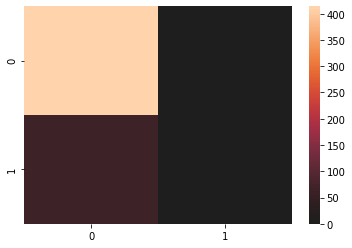

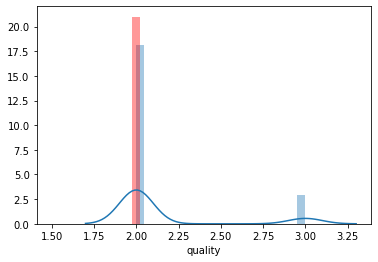

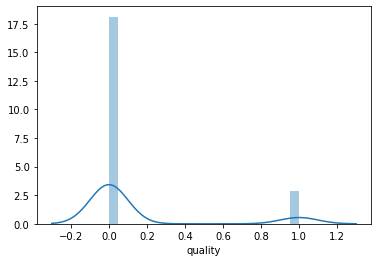

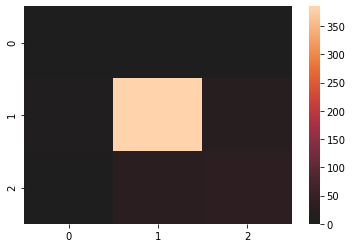

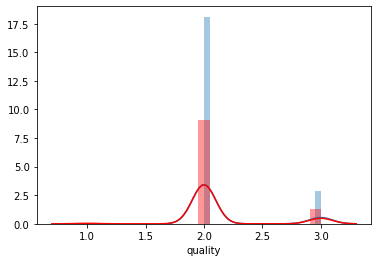

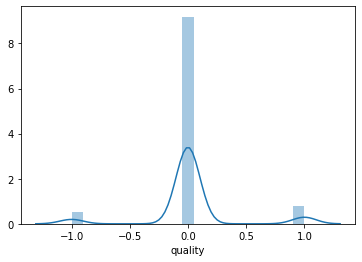

In [47]:
clf = MLPClassifier(hidden_layer_sizes=(best_params_BMG_SC["h"]), max_iter=10000, alpha=best_params_BMG_SC["alpha"],solver=best_params_BMG_SC["solver"],activation=best_params_BMG_SC["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_BMG_SC, Y_train)
Y_pred_BMG_SC = clf.predict(X_valid_BMG_SC)
Statistic(Y_valid,Y_pred_BMG_SC,"MLP GB_SC")

clf = MLPClassifier(hidden_layer_sizes=(best_params_GB_SC["h"]), max_iter=10000, alpha=best_params_GB_SC["alpha"],solver=best_params_GB_SC["solver"],activation=best_params_GB_SC["mode"],tol=1e-9,verbose=False)
clf.fit(X_train_GB_SC, Y_train)
Y_pred_GB_SC = clf.predict(X_valid_GB_SC)
print("score: ",accuracy_score(Y_valid, Y_pred_GB_SC))
Statistic(Y_valid,Y_pred_GB_SC,"MLP GB_SC")